In [2]:
!wget https://github.com/fjbautistas/kde_example/raw/master/data/exoplanet.eu_catalog_21.csv

--2022-02-21 14:57:51--  https://github.com/fjbautistas/kde_example/raw/master/data/exoplanet.eu_catalog_21.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fjbautistas/kde_example/master/data/exoplanet.eu_catalog_21.csv [following]
--2022-02-21 14:57:52--  https://raw.githubusercontent.com/fjbautistas/kde_example/master/data/exoplanet.eu_catalog_21.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2244760 (2.1M) [text/plain]
Saving to: ‘exoplanet.eu_catalog_21.csv’

exoplanet.eu_catalo 100%[===================>]   2.14M  --.-KB/s    in 0.1s    

2022-02-21 14:57:52 (16.7 MB/s) - ‘exoplanet

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [5]:
data_o = pd.read_csv('exoplanet.eu_catalog_21.csv', 
                       usecols = ['mass','semi_major_axis',
                                  'star_metallicity'])

In [8]:
data_o = data_o.replace([np.inf, -np.inf], np.nan) 
data_o = data_o.replace([0], np.nan)
data_o = data_o.dropna()

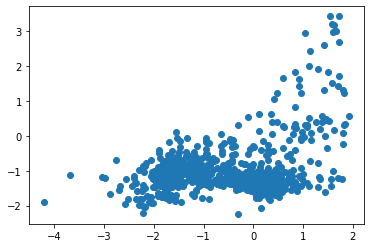

In [14]:
plt.scatter(np.log10(data_o.mass),np.log10(data_o.semi_major_axis))